In [1]:
%matplotlib inline

In [1]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Joan Massich <mailsik@gmail.com>
#
# License: BSD Style.

import os.path as op

import mne
from mne.datasets import eegbci
from mne.datasets import fetch_fsaverage

# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = op.dirname(fs_dir)

# The files live in:
subject = 'fsaverage'
#trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
trans = op.join(fs_dir, 'bem', 'fsaverage-trans.fif')
src = op.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
bem = op.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')

0 files missing from /Users/ilamiheev/anaconda3/lib/python3.7/site-packages/mne/datasets/_fsaverage/root.txt in /Users/ilamiheev/mne_data/MNE-fsaverage-data
0 files missing from /Users/ilamiheev/anaconda3/lib/python3.7/site-packages/mne/datasets/_fsaverage/bem.txt in /Users/ilamiheev/mne_data/MNE-fsaverage-data/fsaverage


In [2]:
raw_fname = '/Users/ilamiheev/Downloads/Iliya_1/335_Sibirev_Math/edf_reals/Sibirev_335_05_rr_f3.5-40_eyesClean_new_n_160_m_242_t_245_eda_0_.edf'
raw = mne.io.read_raw_edf(raw_fname, preload=True)
montage = mne.channels.read_montage('GSN-HydroCel-128')

Extracting EDF parameters from /Users/ilamiheev/Downloads/Iliya_1/335_Sibirev_Math/edf_reals/Sibirev_335_05_rr_f3.5-40_eyesClean_new_n_160_m_242_t_245_eda_0_.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6999  =      0.000 ...    13.998 secs...


<ipython-input-2-3bd4b43d246c>:2: RuntimeWarning: 29 channel names are too long, have been truncated to 15 characters:
['EEG Chan 100-CAR', 'EEG Chan 101-CAR', 'EEG Chan 102-CAR', 'EEG Chan 103-CAR', 'EEG Chan 104-CAR', 'EEG Chan 105-CAR', 'EEG Chan 106-CAR', 'EEG Chan 107-CAR', 'EEG Chan 108-CAR', 'EEG Chan 109-CAR', 'EEG Chan 110-CAR', 'EEG Chan 111-CAR', 'EEG Chan 112-CAR', 'EEG Chan 113-CAR', 'EEG Chan 114-CAR', 'EEG Chan 115-CAR', 'EEG Chan 116-CAR', 'EEG Chan 117-CAR', 'EEG Chan 118-CAR', 'EEG Chan 119-CAR', 'EEG Chan 120-CAR', 'EEG Chan 121-CAR', 'EEG Chan 122-CAR', 'EEG Chan 123-CAR', 'EEG Chan 124-CAR', 'EEG Chan 125-CAR', 'EEG Chan 126-CAR', 'EEG Chan 127-CAR', 'EEG Chan 128-CAR']
  raw = mne.io.read_raw_edf(raw_fname, preload=True)


In [38]:
montage

<Montage | GSN-HydroCel-128 - 131 channels: FidNz, FidT9, FidT10 ...>

In [1]:
new_names = dict(
    (ch_name,
     ch_name.rstrip('-').replace('Chan ', 'E').replace('CAR', '').replace('EEG', ''))
    for ch_name in raw.ch_names)
raw.rename_channels(new_names)

NameError: name 'raw' is not defined

In [2]:
epochs

NameError: name 'epochs' is not defined

In [33]:
raw.set_montage(montage)
raw.set_eeg_reference(projection=True)

<ipython-input-33-983d1cadfdab>:2: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference(projection=True)


<RawEDF  |  Sibirev_335_05_rr_f3.5-40_eyesClean_new_n_160_m_242_t_245_eda_0_.edf, n_channels x n_times : 129 x 7000 (14.0 sec), ~7.2 MB, data loaded>

In [34]:
raw.set_montage(montage)

<RawEDF  |  Sibirev_335_05_rr_f3.5-40_eyesClean_new_n_160_m_242_t_245_eda_0_.edf, n_channels x n_times : 129 x 7000 (14.0 sec), ~7.2 MB, data loaded>

In [35]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list |  E1,  E2,  E3,  E4,  E5,  E6,  E7,  E8,  E9, ...
    chs : list | 129 items (EEG: 128, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 131 items (3 Cardinal, 128 EEG)
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : tuple | 2019-04-08 19:59:02 GMT
    nchan : int | 129
    proc_history : list | 0 items
    projs : list | Average EEG reference: off
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_nam

In [56]:
%gui qt 
mne.viz.plot_alignment(
    raw.info, src=src, eeg=['original', 'projected'], trans=trans,
    show_axes=True, mri_fiducials=True, dig='fiducials')

Reading /Users/ilamiheev/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif...
Using outer_skin.surf for head surface.


##### fig = mne.viz.plot_alignment(raw.info, trans, subject='sample', dig=False,
                     eeg=['original', 'projected'], meg=[],
                     coord_frame='head', subjects_dir=subjects_dir)

In [53]:
raw.set_montage(montage)

<RawEDF  |  Sibirev_335_05_rr_f3.5-40_eyesClean_new_n_160_m_242_t_245_eda_0_.edf, n_channels x n_times : 129 x 7000 (14.0 sec), ~7.2 MB, data loaded>

In [54]:
raw.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list |  E1,  E2,  E3,  E4,  E5,  E6,  E7,  E8,  E9, ...
    chs : list | 129 items (EEG: 128, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 131 items (3 Cardinal, 128 EEG)
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : tuple | 2019-04-08 19:59:02 GMT
    nchan : int | 129
    proc_history : list | 0 items
    projs : list | Average EEG reference: off
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_nam

In [42]:
fwd = mne.make_forward_solution(raw.info, trans=trans, src=src,
                                bem=bem, eeg=True, mindist=5.0, n_jobs=1)
print(fwd)

# for illustration purposes use fwd to compute the sensitivity map
eeg_map = mne.sensitivity_map(fwd, ch_type='eeg', mode='fixed')
eeg_map.plot(time_label='EEG sensitivity', subjects_dir=subjects_dir,
             clim=dict(lims=[5, 50, 100]))

Source space          : /Users/ilamiheev/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif
MRI -> head transform : /Users/ilamiheev/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : /Users/ilamiheev/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading /Users/ilamiheev/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif...
Read 2 source spaces a total of 20484 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.000000  0.000000       1.00

Read 128 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Setting up the BEM model 

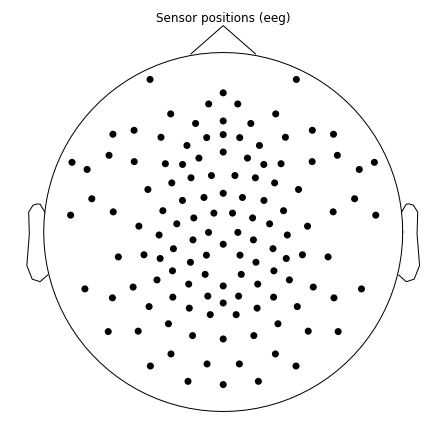

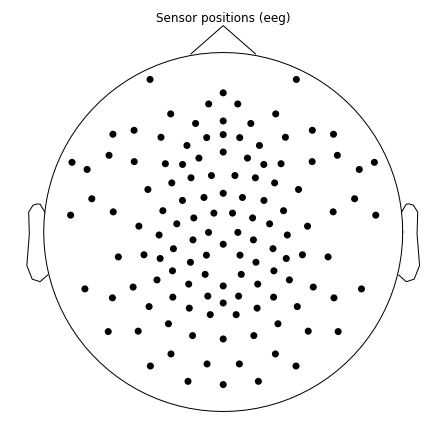

In [ ]:
raw_fname, = eegbci.load_data(subject=1, runs=[6])
raw = mne.io.read_raw_edf(raw_fname, preload=True)

# Clean channel names to be able to use a standard 1005 montage
new_names = dict(
    (ch_name,
     ch_name.rstrip('.').upper().replace('Z', 'z').replace('FP', 'Fp'))
    for ch_name in raw.ch_names)
raw.rename_channels(new_names)

# Read and set the EEG electrode locations
montage = mne.channels.make_standard_montage('standard_1005')

raw.set_montage(montage)
raw.set_eeg_reference(projection=True)  # needed for inverse modeling

# Check that the locations of EEG electrodes is correct with respect to MRI
mne.viz.plot_alignment(
    raw.info, src=src, eeg=['original', 'projected'], trans=trans,
    show_axes=True, mri_fiducials=True, dig='fiducials')

In [ ]:
fwd = mne.make_forward_solution(raw.info, trans=trans, src=src,
                                bem=bem, eeg=True, mindist=5.0, n_jobs=1)
print(fwd)

# for illustration purposes use fwd to compute the sensitivity map
eeg_map = mne.sensitivity_map(fwd, ch_type='eeg', mode='fixed')
eeg_map.plot(time_label='EEG sensitivity', subjects_dir=subjects_dir,
             clim=dict(lims=[5, 50, 100]))